# Exercise Seven Starter: Textual Analysis

In this exercise, I will not be providing the subheadings. Work from our code examples and the textbooks to construct a well-documented notebook that provides a model for initial textual analysis of a multi-document corpus.

Your workflow should:

- Import at least three documents you would like to compare (from text files, or using another format for a challenge.)
- Preprocess the text and create a tokenized corpus from the text of the imported documents.
- Create a document term matrix to enable comparative textual analysis across the full set of documents
- Chart at least one comparison between the documents, using word frequency to map the text
- Calculate the Euclidean distance between the documents, using two key words as the point of comparison

As a bonus challenge, consider trying one of the other types of distance modeling described in the text.

## Step One - Import Documents

The documents selected are:

- Artistotle - Politics, A Treatise on Government
- Hume - A Treatise of Human Nature
- Kant - The Critique of Pure Reason
- Locke - Second Treatise of Government
- Mill - On Liberty
- Plato - The Republic
- Thoreau - Walden

In [4]:
import nltk
import nltk.tokenize

nltk.download('punkt', quiet=True)

corpus = ["Artistotle.txt","Hume.txt","Kant.txt","Locke.txt","Mill.txt","Plato.txt","Thoreau.txt"]
titles = ["Aristotle", "Hume", "Kant","Locke", "Mill", "Plato","Thoreau"]
documents = []
for url in corpus:
    f = open(url, encoding='utf-8')
    text = f.read()
    documents.append(text)


## Step Two - Preprocess the Text to Create Tokenized Corpus

In [5]:
import re

PUNCT_RE = re.compile(r'[^\w\s]+$')

def is_punct(string):
    """Check if STRING is a punctuation marker or a sequence of
       punctuation markers.
    """
    return PUNCT_RE.match(string) is not None

In [6]:
def preprocess_text(text, language, lowercase=True):
    """Preprocess a text.

    Perform a text preprocessing procedure, which transforms a string
    object into a list of word tokens without punctuation markers.

    """
    if lowercase:
        text = text.lower()
    tokens = nltk.tokenize.word_tokenize(text, language=language)
    tokens = [token for token in tokens if not is_punct(token)]
    return tokens

In [8]:
tokenized = []
for text in documents:
    tokenized.append(preprocess_text(text, "english"))



## Step Three - Create Document Term Matrix

In [9]:
def extract_vocabulary(tokenized_corpus, min_count=1, max_count=float('inf')):
    """Extract a vocabulary from a tokenized corpus.

    Arguments:
        tokenized_corpus (list): a tokenized corpus represented, list
            of lists of strings.
        min_count (int, optional): the minimum occurrence count of a
            vocabulary item in the corpus.
        max_count (int, optional): the maximum occurrence count of a
            vocabulary item in the corpus. Defaults to inf.

    Returns:
        list: An alphabetically ordered list of unique words in the
            corpus, of which the frequencies adhere to the specified
            minimum and maximum count.

    Examples:
        >>> corpus = [['the', 'man', 'love', 'man', 'the'],
                      ['the', 'love', 'book', 'wise', 'drama'],
                      ['a', 'story', 'book', 'drama']]
        >>> extract_vocabulary(corpus, min_count=2)
        ['book', 'drama', 'love', 'man', 'the']

    """
    vocabulary = collections.Counter()
    for document in tokenized_corpus:
        vocabulary.update(document)
    vocabulary = {word for word, count in vocabulary.items()
                  if count >= min_count and count <= max_count}
    return sorted(vocabulary)
import collections
vocabulary = extract_vocabulary(tokenized, min_count=2)
print(vocabulary[0:100])

["'as-is", "'d", "'ll", "'s", "'t", '-pearl', '//gutenberg.org/license', '//pglaf.org', '//pglaf.org/donate', '//pglaf.org/fundraising', '//www.gutenberg.org', '//www.pgdp.net', '//www.pglaf.org', '/i', '0', '0.', '0.02', '0.06', '0.10', '0.22', '0.75', '1', '1.', '1.00', '1.a', '1.b', '1.c', '1.d', '1.e', '1.e.1', '1.e.2', '1.e.3', '1.e.4', '1.e.5', '1.e.6', '1.e.7', '1.e.8', '1.e.9', '1.f', '1.f.1', '1.f.2', '1.f.3', '1.f.4', '1.f.5', '1.f.6', '1/2', '1/3', '10', '10.', '100', '100,000', '100.', '101', '102', '103', '104', '106.', '107', '108', '11', '11.', '112', '113', '116.', '117', '118', '12', '12.', '121', '122', '124', '125', '126', '129', '13', '13.', '13.34', '130', '131', '135', '136', '137', '138', '14', '14.', '14.72½', '140', '142', '143', '146', '149', '15', '15.', '150', '1500', '151', '152', '16', '16.', '160']


## Step Four - Chart Comparison Between Liberty and Duties

In [10]:
def corpus2dtm(tokenized_corpus, vocabulary):
    """Transform a tokenized corpus into a document-term matrix.

    Arguments:
        tokenized_corpus (list): a tokenized corpus as a list of
        lists of strings. vocabulary (list): An list of unique words.

    Returns:
        list: A list of lists representing the frequency of each term
              in `vocabulary` for each document in the corpus.

    Examples:
        >>> tokenized_corpus = [['the', 'man', 'man', 'smart'],
                                ['a', 'the', 'man' 'love'],
                                ['love', 'book', 'journey']]
        >>> vocab = ['book', 'journey', 'man', 'love']
        >>> corpus2dtm(tokenized_corpus, vocabulary)
        [[0, 0, 2, 0], [0, 0, 1, 1], [1, 1, 0, 1]]

    """
    document_term_matrix = []
    for document in tokenized_corpus:
        document_counts = collections.Counter(document)
        row = [document_counts[word] for word in vocabulary]
        document_term_matrix.append(row)
    return document_term_matrix

import numpy as np

document_term_matrix = np.array(corpus2dtm(tokenized, vocabulary))
liberty_id = vocabulary.index('liberty')
duties_id = vocabulary.index('duties')

liberty_counts = document_term_matrix[:, liberty_id]
duties_counts = document_term_matrix[:, duties_id]
print("Liberty: " + str(liberty_counts))
print("Duties: " + str(duties_counts))

Liberty: [24 57 20 75 96 21  6]
Duties: [ 1 24  1  1  9 19  2]


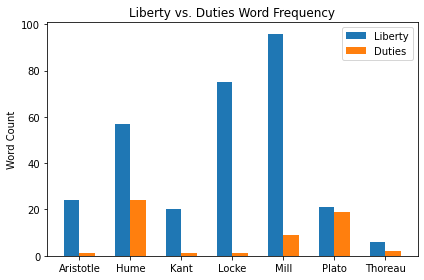

In [11]:
import matplotlib.pyplot as plt

x = np.arange(len(titles))
width = 0.3

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, liberty_counts, width, label='Liberty')
rects2 = ax.bar(x + width/2, duties_counts, width, label='Duties')

ax.set_ylabel('Word Count')
ax.set_title('Liberty vs. Duties Word Frequency')
ax.set_xticks(x)
ax.set_xticklabels(titles)
ax.legend()

fig.tight_layout()

plt.show()